In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# I read the data

R171 = pd.read_csv('Ruprecht_171.csv')
R171

Text(0.5, 0, 'Parallax [mas]')

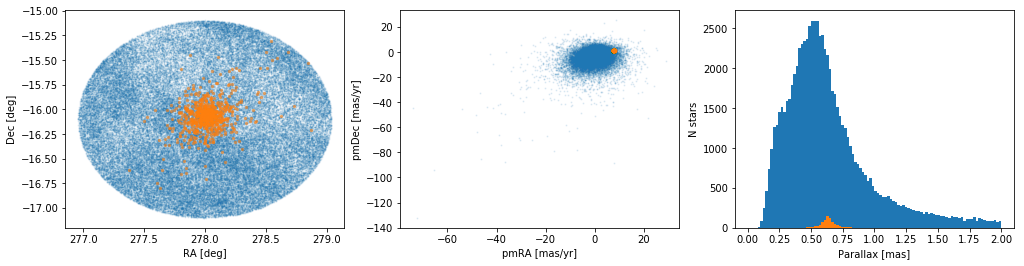

In [4]:
# I plot the data as a check

m = R171.Member == 1

plt.figure(figsize=(17,4))
plt.subplot(131)
plt.scatter(R171.ra, R171.dec, s=1, alpha=0.1)
plt.scatter(R171.ra[m], R171.dec[m], s=5, alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')

plt.subplot(132)
plt.scatter(R171.pmra, R171.pmdec, s=1, alpha=0.1)
plt.scatter(R171.pmra[m], R171.pmdec[m], s=5, alpha=0.5)
plt.xlabel('pmRA [mas/yr]')
plt.ylabel('pmDec [mas/yr]')

plt.subplot(133)
h= plt.hist(R171.parallax, range=[0,2], bins=100)
h= plt.hist(R171.parallax[m], range=[0,2], bins=100)
plt.ylabel('N stars')
plt.xlabel('Parallax [mas]')


In [5]:
#I define the target feature

y = R171.Member

In [6]:
#I check if the target class is balanced. Is unbalanced.


print('Cluster members: {}'.format(len(y[y==1])))
print('Field stars: {}'.format(len(y[y==0])))

Cluster members: 756
Field stars: 75670


In [7]:
#I undersample the majority class


from imblearn.under_sampling import RandomUnderSampler
strategy = {1:756, 0:10000}
under = RandomUnderSampler(sampling_strategy=strategy)
R171_under, y_under = under.fit_resample(R171, y)
#R171_under = R171
#y_under = y

Text(0.5, 0, 'Parallax [mas]')

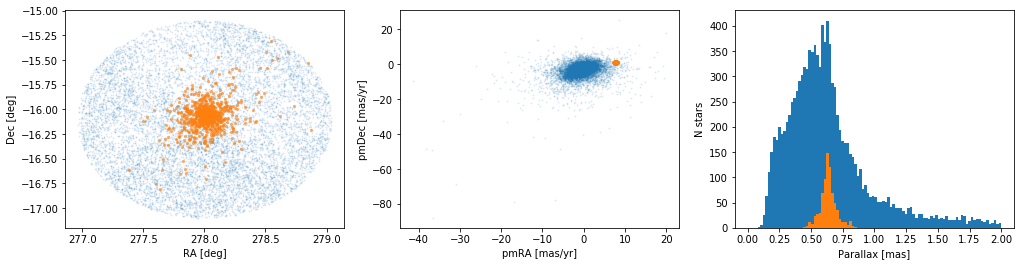

In [8]:
#I plot the resulting dataset again as a further check


m = R171_under.Member == 1

plt.figure(figsize=(17,4))
plt.subplot(131)
plt.scatter(R171_under.ra, R171_under.dec, s=1, alpha=0.1)
plt.scatter(R171_under.ra[m], R171_under.dec[m], s=5, alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')

plt.subplot(132)
plt.scatter(R171_under.pmra, R171_under.pmdec, s=1, alpha=0.1)
plt.scatter(R171_under.pmra[m], R171_under.pmdec[m], s=5, alpha=0.5)
plt.xlabel('pmRA [mas/yr]')
plt.ylabel('pmDec [mas/yr]')

plt.subplot(133)
h= plt.hist(R171_under.parallax, range=[0,2], bins=100)
h= plt.hist(R171_under.parallax[m], range=[0,2], bins=100)
plt.ylabel('N stars')
plt.xlabel('Parallax [mas]')


In [9]:
#I define the input features and the target feature after the random undersampler

X = R171_under[['ra','dec','pmra','pmdec','parallax']]
y = R171_under['Member']


In [22]:
#test-train splitter

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number instances in the train sample: {}".format(len(X_train)))
print("Number instances in the test sample: {}".format(len(X_test)))


Number instances in the train sample: 8604
Number instances in the test sample: 2152


In [23]:
X_train

,ra,dec,pmra,pmdec,parallax
6081,277.794596,-16.764620,1.345356,-1.527026,0.394562
6409,278.255209,-15.552431,0.974350,-1.548641,0.584962
1209,277.468677,-15.860104,1.376775,-4.145431,0.382264
3053,278.039340,-16.198034,0.313824,-0.680524,0.402010
6716,278.569783,-16.589154,-3.370665,-5.393488,0.492526
...,...,...,...,...,...
2273,277.915956,-16.900896,-4.512851,-4.647155,0.489646
7563,278.104543,-15.884934,2.876319,-8.688657,0.794428
4879,278.241045,-16.252495,-2.814252,0.341617,1.123106
95,278.099476,-16.602928,-0.118826,-6.997683,0.600184


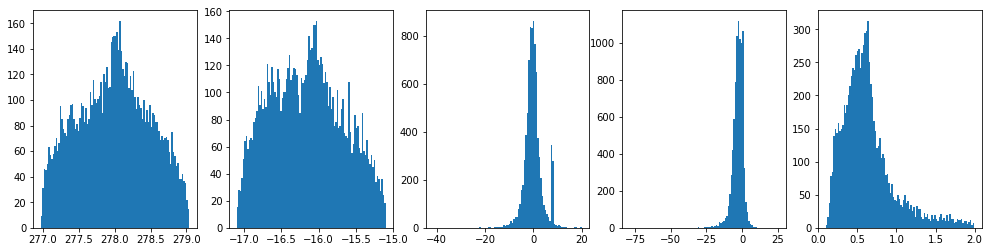

In [24]:
#let me plot the train set again... oops the parallax feature is highly skewed

plt.figure(figsize=(17,4))

plt.subplot(151)
h = plt.hist(X_train.ra, bins=100)

plt.subplot(152)
h = plt.hist(X_train.dec, bins=100)

plt.subplot(153)
h = plt.hist(X_train.pmra, bins=100)

plt.subplot(154)
h = plt.hist(X_train.pmdec, bins=100)

plt.subplot(155)
h = plt.hist(X_train.parallax, bins=100)

/Users/lspina/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


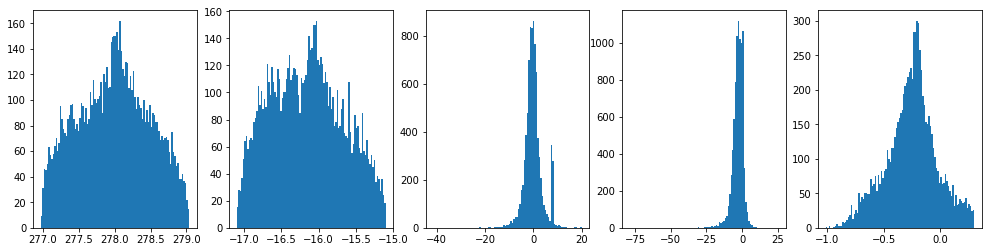

In [25]:
#I transform the parallax feature... now it looks better

X_train.parallax = np.log10(X_train.parallax)
X_test.parallax = np.log10(X_test.parallax)

plt.figure(figsize=(17,4))

plt.subplot(151)
h = plt.hist(X_train.ra, bins=100)

plt.subplot(152)
h = plt.hist(X_train.dec, bins=100)

plt.subplot(153)
h = plt.hist(X_train.pmra, bins=100)

plt.subplot(154)
h = plt.hist(X_train.pmdec, bins=100)

plt.subplot(155)
h = plt.hist(X_train.parallax, bins=100)

In [26]:
# standardization

from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)


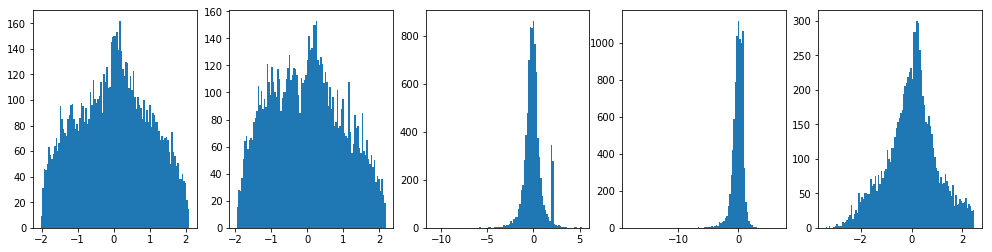

In [27]:
# Let me plot everything again...

plt.figure(figsize=(17,4))

plt.subplot(151)
h = plt.hist(X_train_std.T[0], bins=100)

plt.subplot(152)
h = plt.hist(X_train_std.T[1], bins=100)

plt.subplot(153)
h = plt.hist(X_train_std.T[2], bins=100)

plt.subplot(154)
h = plt.hist(X_train_std.T[3], bins=100)

plt.subplot(155)
h = plt.hist(X_train_std.T[4], bins=100)

In [28]:
# gridsearch.... with f1 as the evaluation metric

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

m = SVC(kernel='rbf', gamma=0.1, C=10)
parameters = {'kernel':['rbf'], 'gamma':[0.05, 0.1,0.2, 0.3], 'C':[1, 10, 100, 200, 300]}

clf = GridSearchCV(m, parameters, cv=5, scoring='f1', verbose=True)

clf.fit(X_train_std, y_train)

print("The best hyperarameters: {}".format(clf.best_params_))
print("The final score: {}".format(clf.best_score_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best hyperarameters: {'C': 300, 'gamma': 0.3, 'kernel': 'rbf'}
The final score: 0.9881562245442078


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [29]:
# cool! now that I have the best parameters I train the SVM classifier

m_def = SVC(**clf.best_params_, probability=True)
m_def.fit(X_train_std, y_train)


SVC(C=300, gamma=0.3, probability=True)

In [30]:
# predictions on the test set

y_pred_test = m_def.predict(X_test_std)
proba_test = m_def.predict(X_test_std)


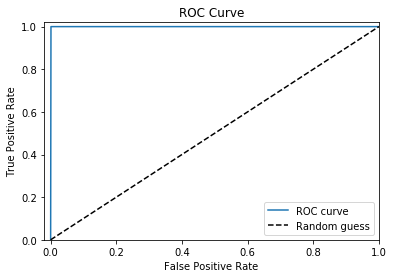

In [31]:
#roc auc

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, proba_test)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [32]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_test)


1.0

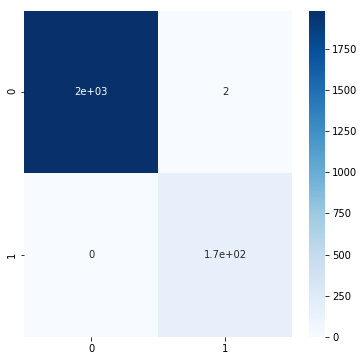

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), cmap='Blues', annot=True)

